<a href="https://colab.research.google.com/github/drashtikshah/TSA-experiments-/blob/main/TSA_EXPT2_DRASHTI_SHAH_60009210079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade xlrd

***Q1 FB.csv***

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

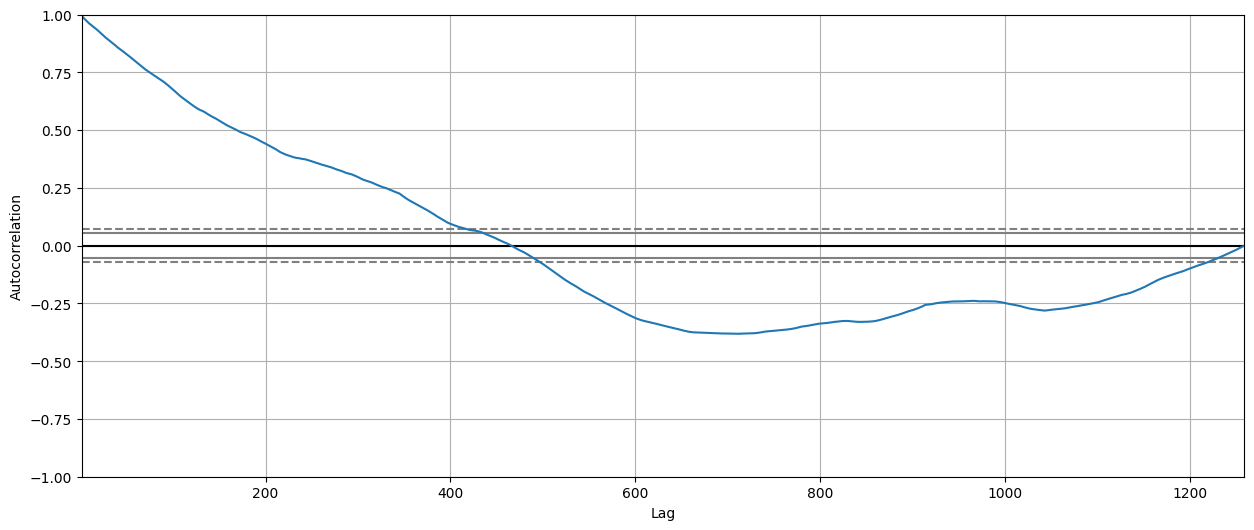

In [ ]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"/content/FB.csv", index_col=0)
plt.rcParams.update({'figure.figsize':(15,6)})
autocorrelation_plot(df.Close.tolist())

As you can see in the above ACF plot, Close column of FB dataset is plotted showing lags.

Q.3 multiplicative

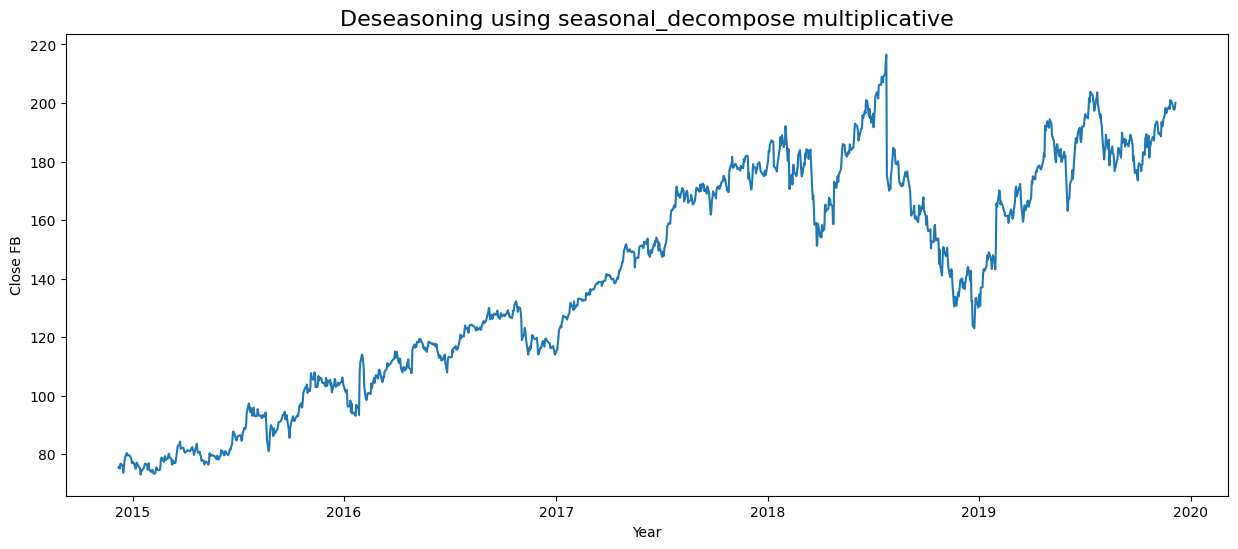

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"/content/FB.csv", index_col=0, parse_dates=True)
result_mul = seasonal_decompose(df['Close'], model = 'multiplicative', extrapolate_trend='freq', period=1, two_sided=True)
deseason = df['Close'] - result_mul.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose multiplicative', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Close FB')
plt.show()

Data is deseasoned using multiplicative model removing all sorts of seasonality.

Q.3 additive

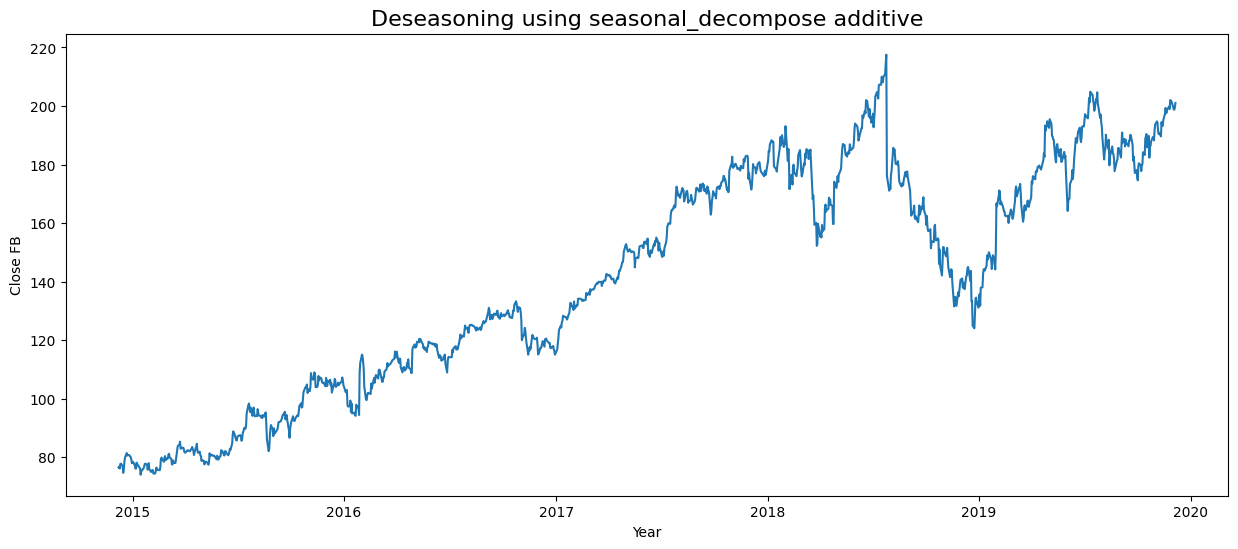

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv(r"/content/FB.csv", index_col=0, parse_dates=True)
result_add = seasonal_decompose(df['Close'], model = 'additive', extrapolate_trend='freq', period=1, two_sided=True)
deseason = df['Close'] - result_add.seasonal
plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose additive', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Close FB')
plt.show()

Here data is deseasoned using additive method. As you can see the multiplicative and additive model graphs are the same.

Here data is deseasoned using the library seasonal_decompose for multiplicative model. As you can see it shows seasonality, trends and residual for the method.

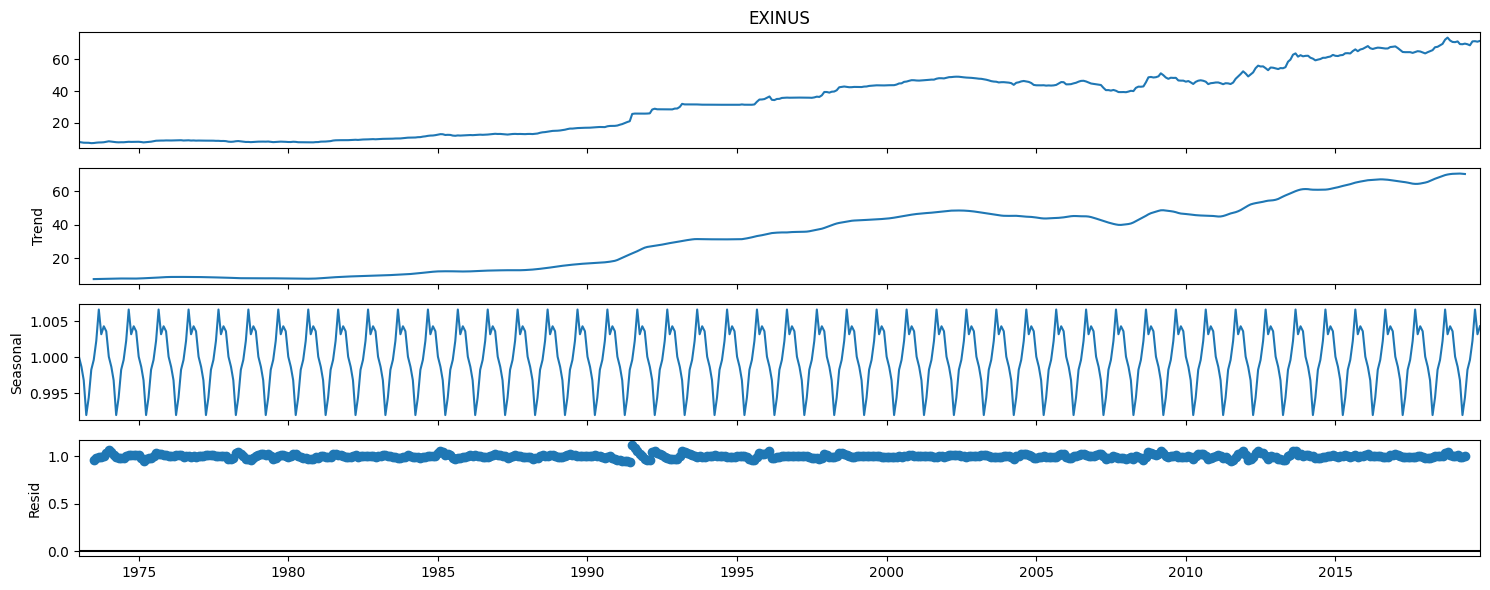

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_excel(r'/content/India_Exchange_Rate_Dataset.xls',
index_col=0,parse_dates=True)
result = seasonal_decompose(df['EXINUS'], model='mul')
result.plot();

Here the same thing as above is repeated for the additive model. Only the residuals are different the rest is same.

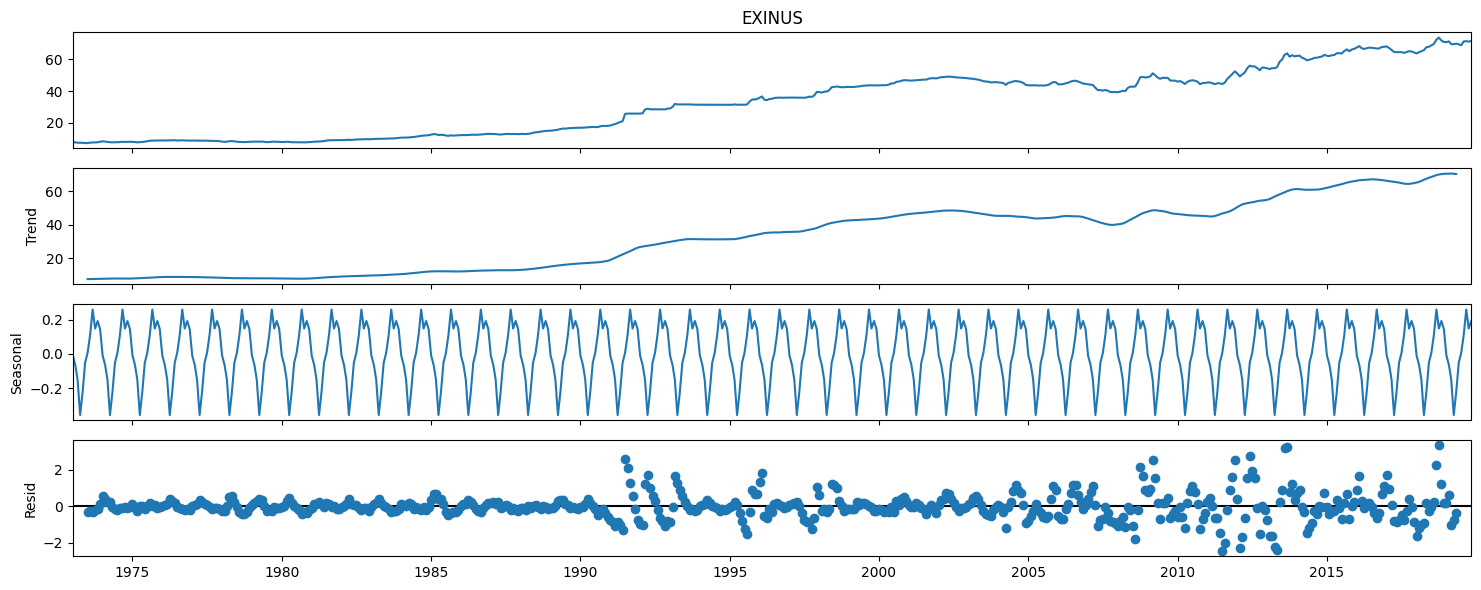

In [ ]:
result = seasonal_decompose(df['EXINUS'], model='add')
result.plot();

For FB dataset observed, trends, seasonality and residuals are all same for both multiplicative and additive methods.

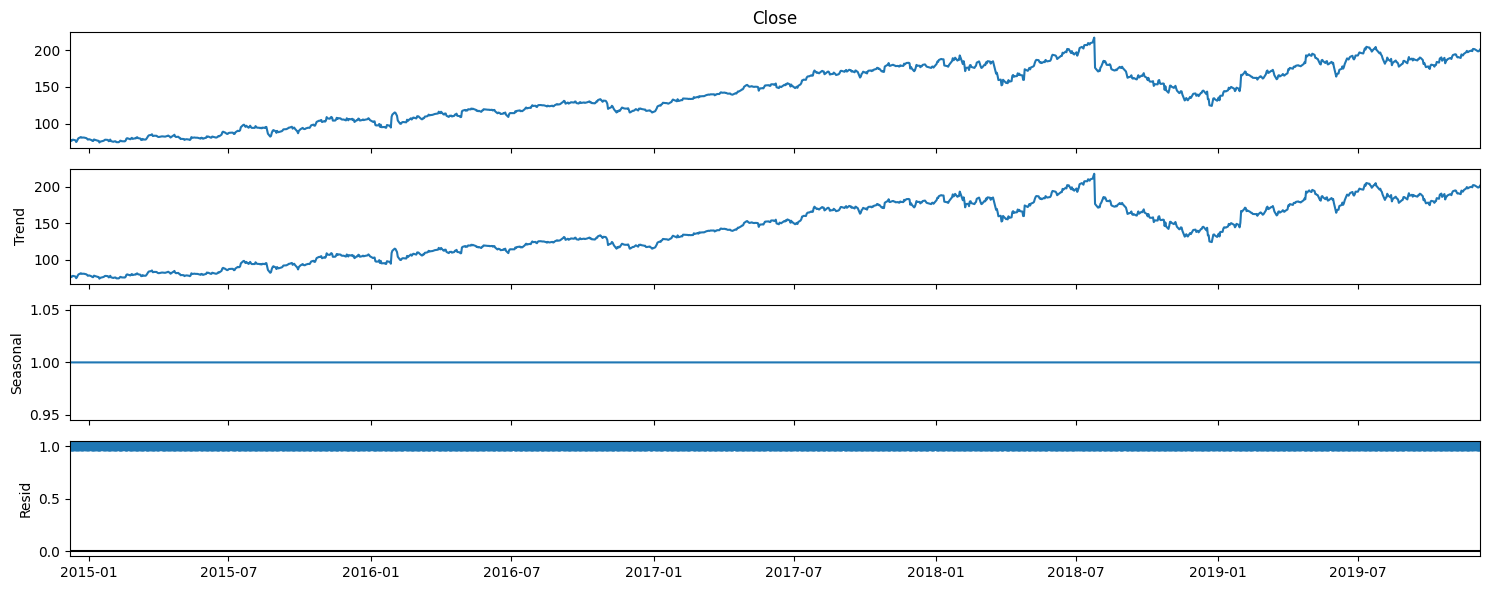

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
df = pd.read_csv(r'/content/FB.csv',
index_col=0,parse_dates=True)
result = seasonal_decompose(df['Close'], model='mul', extrapolate_trend='freq', period=1, two_sided=True)
result.plot();

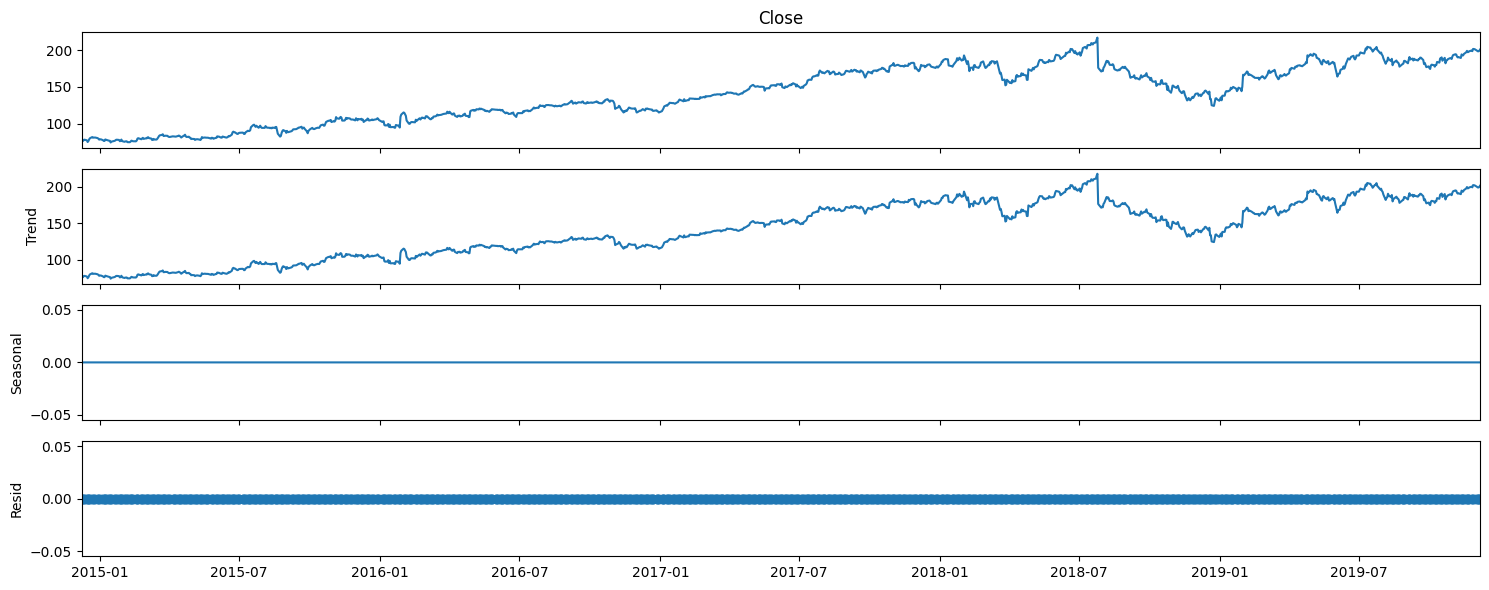

In [ ]:
result = seasonal_decompose(df['Close'], model='add', extrapolate_trend='freq', period=1, two_sided=True)
result.plot();

Q2 Scratch

Here the trends present in the Close column of FB dataset are shown. As we can see it's an upward trend

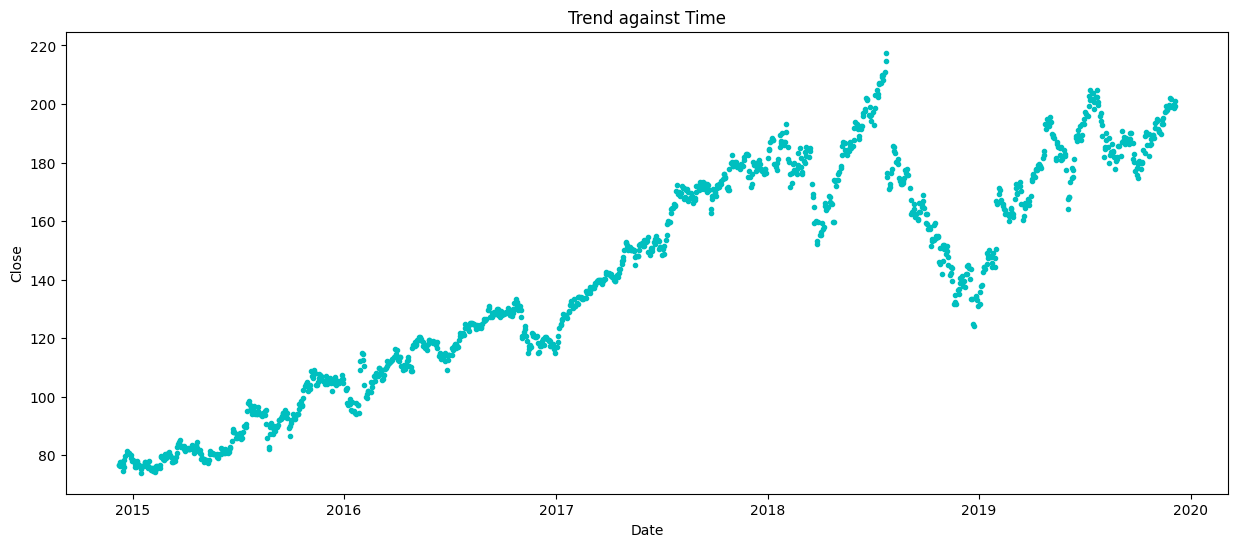

In [ ]:
import numpy as np
T_Series = pd.read_csv(r'/content/FB.csv',
index_col=0,parse_dates=True)
Trend = T_Series.Close
plt.plot(T_Series.Close, 'c.')
plt.title("Trend against Time")
plt.xlabel("Date")
plt.ylabel("Close");

Here the seasonality is shown and as it can be seen that seasonality exists.

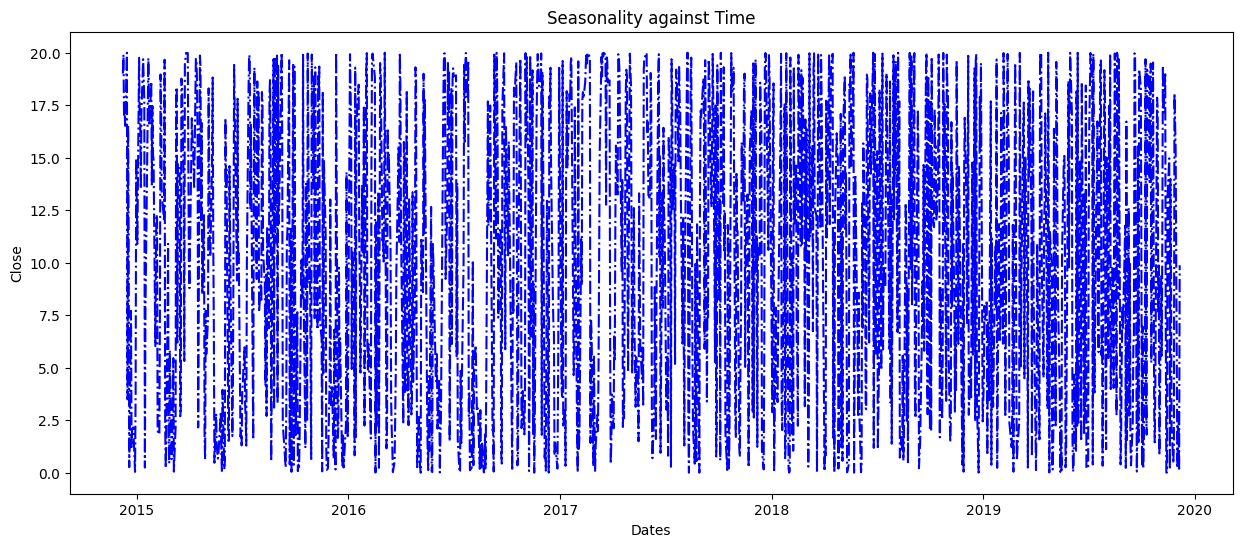

In [ ]:
seasonality = 10 + np.sin(T_Series.Close) * 10
plt.plot(  seasonality, 'b-.')
plt.title("Seasonality against Time")
plt.xlabel("Dates")
plt.ylabel("Close");

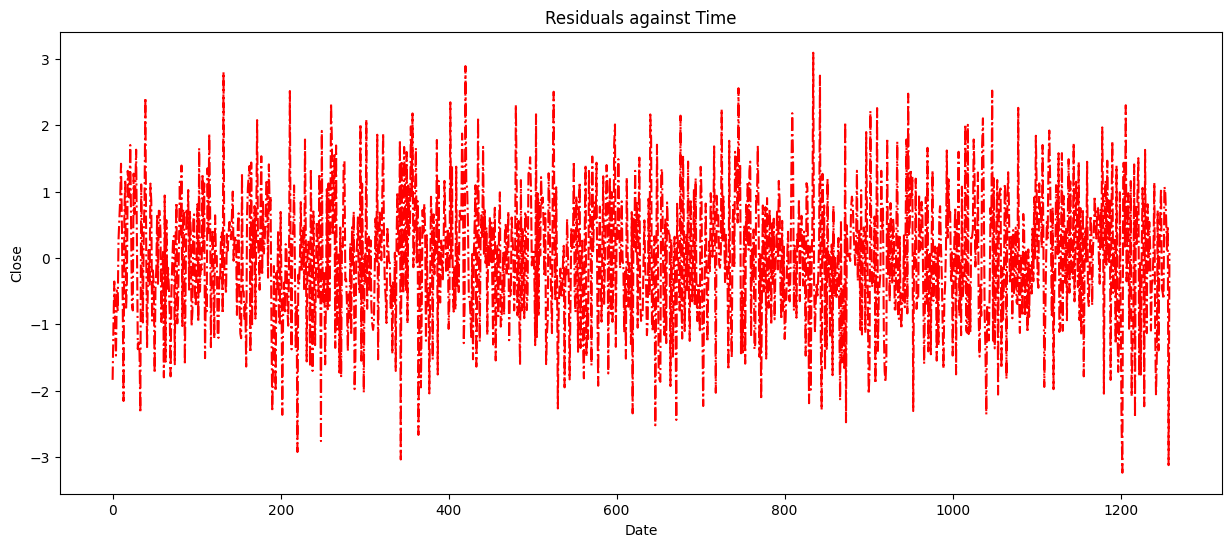

In [ ]:
residual = np.random.normal(loc=0.0, scale=1, size=len(T_Series.Close))
plt.plot( residual, 'r-.')
plt.title("Residuals against Time")
plt.xlabel("Date")
plt.ylabel("Close");

Data is deseasoned using additive model from scratch by adding values of trend, seasonality and residuals.

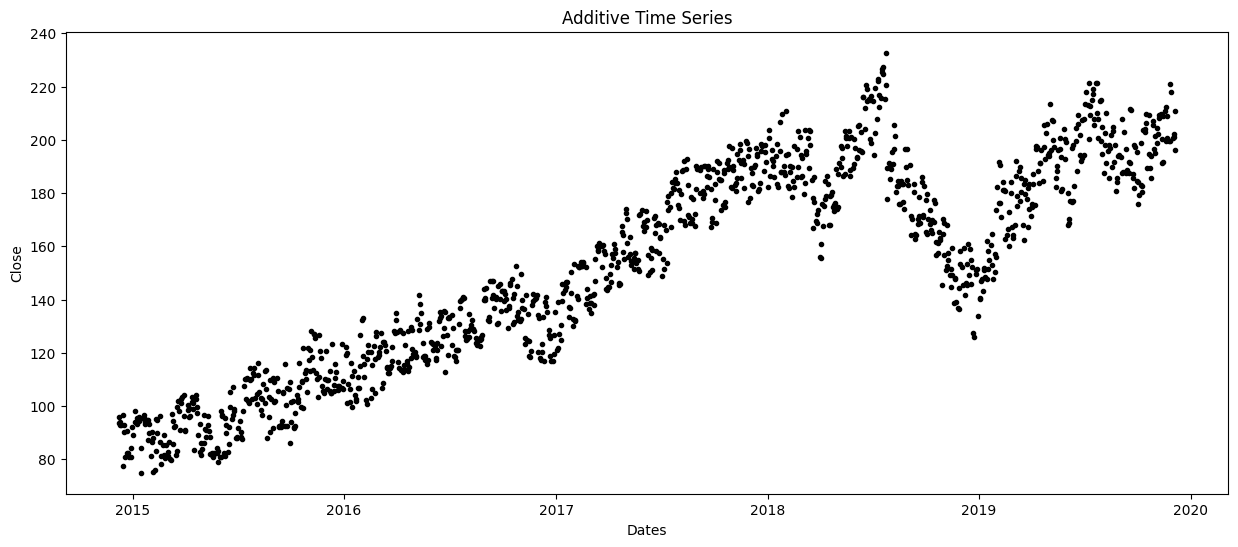

In [ ]:
additive_Tmodel = Trend + seasonality + residual
plt.plot( additive_Tmodel, 'k.')
plt.title("Additive Time Series")
plt.xlabel("Dates")
plt.ylabel("Close");

Data is deseasoned using multiplicative model by multiplying trend, seasonality and ignored residual.

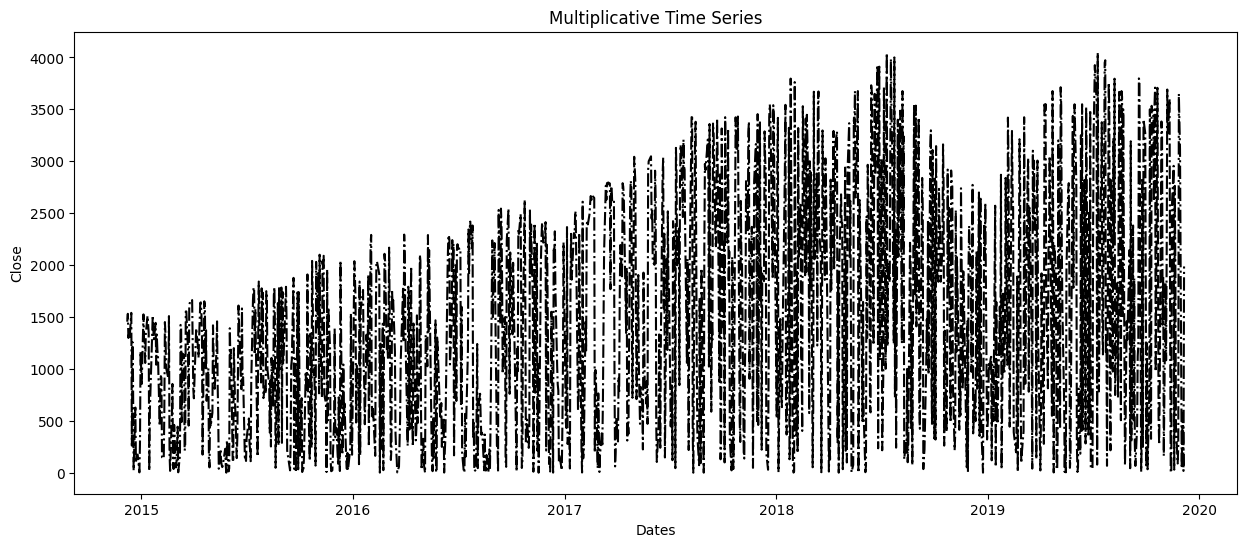

In [ ]:
ignored_residual = np.ones_like(residual)
multiplicative_Tmodel = Trend * seasonality * ignored_residual
plt.plot( multiplicative_Tmodel, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("Dates")
plt.ylabel("Close");

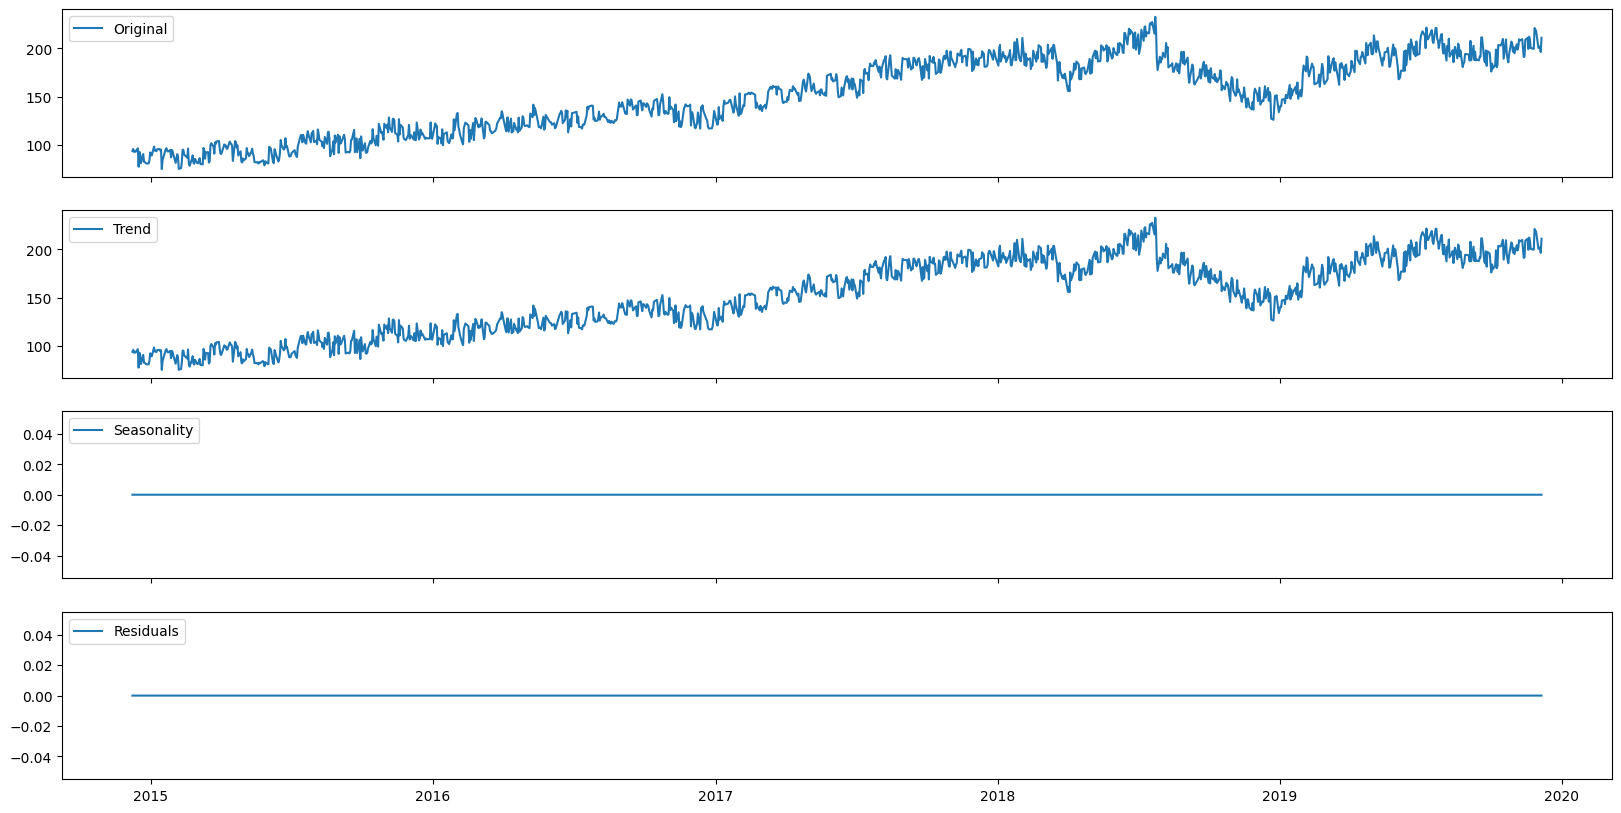

In [ ]:
ts_dicomposition = seasonal_decompose(x=additive_Tmodel, model='additive', extrapolate_trend='freq', period=1, two_sided=True)
trend_estimate = ts_dicomposition.trend
seasonal_estimate = ts_dicomposition.seasonal
residual_estimate = ts_dicomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

axes[0].plot(additive_Tmodel, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');

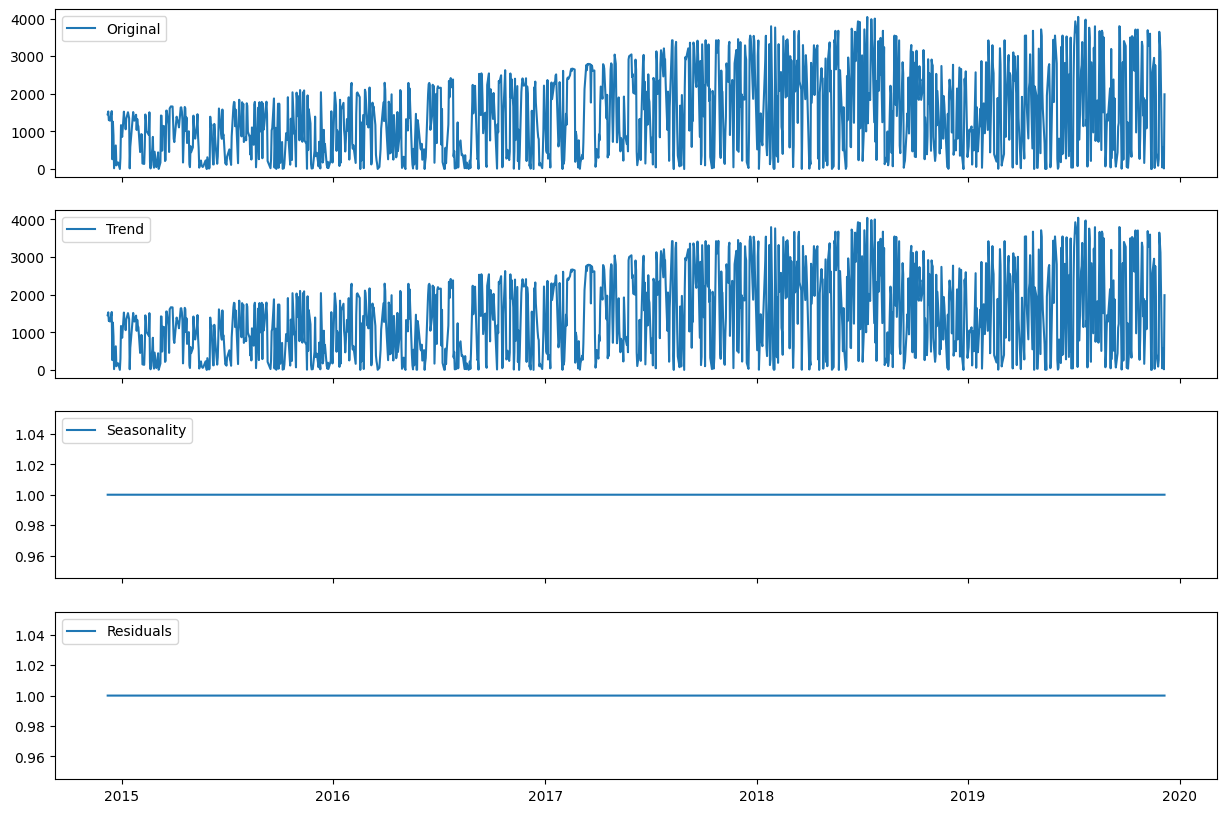

In [ ]:
ts_decomposition = seasonal_decompose(x=multiplicative_Tmodel, model='multiplicative', extrapolate_trend='freq', period=1, two_sided=True)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(multiplicative_Tmodel, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend_estimate, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal_estimate, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual_estimate, label='Residuals')
axes[3].legend(loc='upper left');